# Visualizing The Dataset

In [1]:
!wget = 'https://raw.githubusercontent.com/Doodies/Github-Stars-Predictor/master/finaldata.csv'

--2018-02-19 10:58:14--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2018-02-19 10:58:14--  https://raw.githubusercontent.com/Doodies/Github-Stars-Predictor/master/finaldata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35424703 (34M) [text/plain]
Saving to: ‘finaldata.csv’

finaldata.csv       100%[===================>]  33.78M  41.4MB/s    in 0.8s    

2018-02-19 10:58:15 (41.4 MB/s) - ‘finaldata.csv’ saved [35424703/35424703]

FINISHED --2018-02-19 10:58:15--
Total wall clock time: 1.6s
Downloaded: 1 files, 34M in 0.8s (41.4 MB/s)


In [2]:
!ls

datalab  finaldata.csv


In [0]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
color = sns.color_palette()
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
# mpl.style.use( 'ggplot' )
sns.set_style( 'whitegrid' )
pylab.rcParams[ 'figure.figsize' ] = 8,6

In [0]:
data = pd.read_csv('finaldata.csv')

## Plotting Scatter plot of Stars Count

In [0]:
def plot_feature(df, col):
    plt.scatter(range(df.shape[0]), np.sort(df[col].values))
    plt.xlabel('index', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

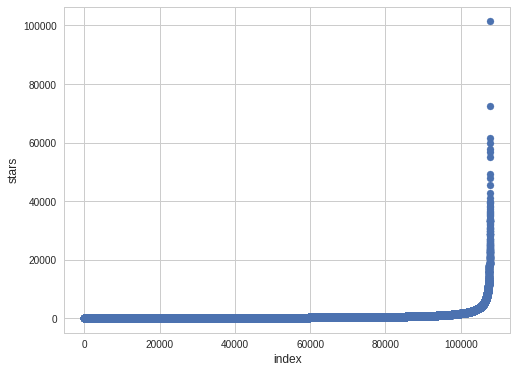

In [7]:
plot_feature(data, "stars")

In [8]:
len(data[data['stars'] > 20000])

122

## Checking Relationship between Stars and forkCount

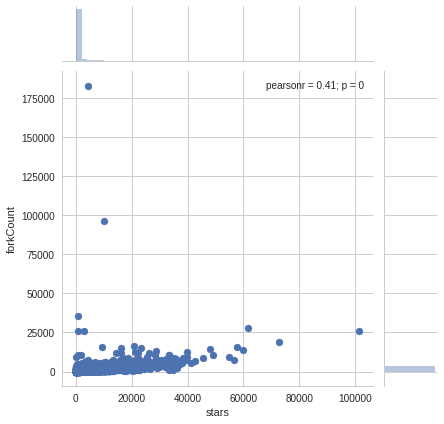

In [9]:
sns.jointplot(x = "stars", y = "forkCount", data = data)

In [10]:
data[data['prMergedComments'] == 0].shape

(31467, 49)

In [0]:
newDf = data.select_dtypes(include=[np.number])

In [12]:
newDf.head()

,branches,commits,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,issuesClosed,issuesOpen,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,repositories,stars,subscribersCount,tags
0,1,700.0,132778,9.0,0.0,51,0.0,0.0,1.0,586,252,50,25,109,9,NaN,0.0,9,39,36,67,135,188,0,0,0,5406,18,5406,817,19,1,153,17,19
1,1,141.0,808,1280.0,16.0,52,9.0,31.0,164.0,3,9,4,19,4,10,NaN,1.0,4,7,8,7,8,11,0,0,0,912,9,917,134,0,113,154,42,0
2,1,95.0,3742,404.0,44.0,29,4.0,7.0,92.0,2,4,13,6,2,4,NaN,3.0,0,0,0,2,0,7,1,0,29,5918,19,5918,882,0,125,190,14,0
3,1,100.0,2260,248.0,713.0,23,0.0,0.0,33.0,25,21,33,12,10,5,NaN,2.0,0,0,0,2,8,3,0,0,0,12409,12,12409,1640,0,136,211,12,2
4,3,96.0,131,22.0,39.0,91,0.0,2.0,8.0,45,48,27,38,19,20,NaN,0.0,5,10,58,21,13,26,7,19,23,2014,2,2014,210,0,43,218,13,2


## Checking the Percentage of zeroes in all columns

In [0]:
cols  = newDf.columns
zero_rows = []
zero_per = []
for i in cols:
  zero_rows.append(newDf[newDf[i] == 0].shape[0])
  zero_per.append(newDf[newDf[i] == 0].shape[0] * 100 / float(data.shape[0]))

In [0]:
df = pd.DataFrame({'col':cols,'numberRows':zero_rows,'zero_per':zero_per})

In [15]:
df.sort_values(['numberRows'], ascending=False)

,col,numberRows,zero_per
30,releases,73496,68.198985
24,prOpenComments,69482,64.474282
25,prOpenCommits,52025,48.275446
23,prOpen,52025,48.275446
34,tags,45413,42.139987
18,prClosedComments,44057,40.881717
6,gistComments,41017,38.060816
16,organizations,40733,37.797285
19,prClosedCommits,37404,34.708213
17,prClosed,37310,34.620988


## Plotting Difference Between Numbers of Users and Organization

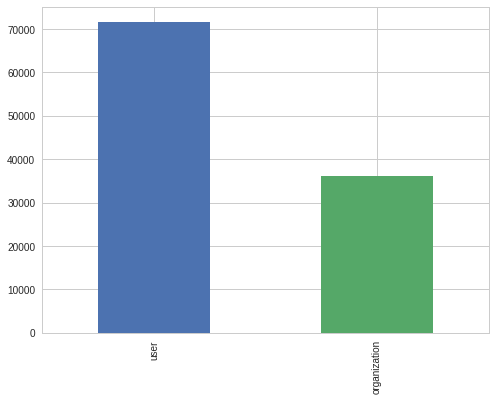

In [16]:
data.type.value_counts()
data.type.value_counts().plot.bar()

## Checking Top 20 Primary Languages

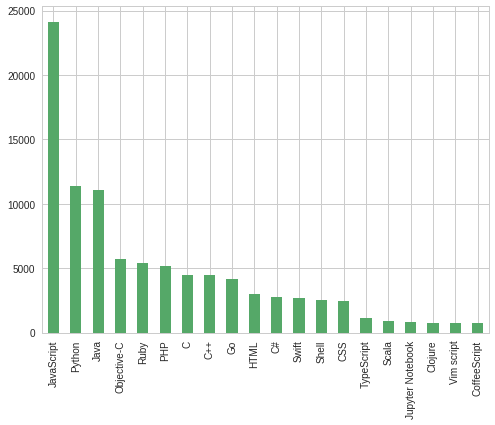

In [17]:
data.primaryLanguage.value_counts()[:20].plot(kind = 'bar', color = color[1])

In [18]:
data.head(3)

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl
0,1,700.0,2014-12-13T08:36:53Z,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,True,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,2018-02-16T15:32:06Z,5406,18,5406,817,19,openScale,1,False,153,17,19,user,2018-02-14T21:05:31Z,NaN
1,1,141.0,2014-12-13T16:41:47Z,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,True,3,9,4,19,False,4,10,NaN,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,2015-10-26T20:58:23Z,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,2018-01-25T22:23:46Z,NaN
2,1,95.0,2014-12-13T04:46:00Z,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,True,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,2016-01-23T17:38:54Z,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,2018-02-02T02:41:14Z,https://bravenewgeek.com


## Changing the time to their Hours Representation

In [0]:
time_columns = ['createdAt','updatedAt','pushedAt']
for i in time_columns:
  data[i] =  data[i].apply(lambda x : x.replace('T',' ').replace('Z',''))

In [0]:
from datetime import datetime

for i in time_columns:
  data[i] = data[i].apply(lambda x: int(datetime.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%s')) / (60 * 60))

In [21]:
data.loc[:, time_columns]

,createdAt,updatedAt,pushedAt
0,394016,421845,421887
1,394024,421366,401636
2,394012,421538,403769
3,394027,421622,417782
4,394018,421836,421098
5,394011,421246,417400
6,394011,421177,400540
7,394024,421818,421737
8,394011,421707,416834
9,394029,421818,405495


In [22]:
data.head(3)

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,True,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,NaN
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,True,3,9,4,19,False,4,10,NaN,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,NaN
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,True,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,https://bravenewgeek.com


## Website Url to Binary Form 1(Yes)/0(No)

In [0]:
data['websiteUrl'] = data['websiteUrl'].fillna('')

In [0]:
data['websiteUrl'] = data['websiteUrl'].apply(lambda x : 1 if len(x) > 0 else 0)

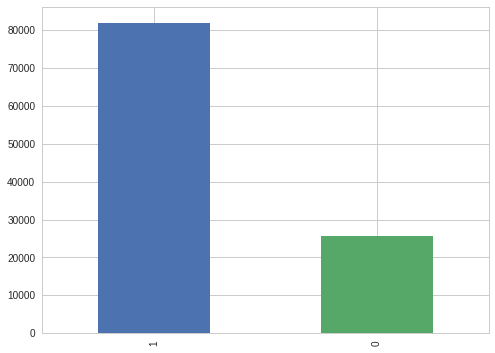

In [25]:
data['websiteUrl'].value_counts().plot.bar()

In [26]:
data.head(3)

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,True,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,0
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,True,3,9,4,19,False,4,10,NaN,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,True,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,1


## Description Word and Character Count

In [0]:
data['description'] = data['description'].fillna('') 

In [0]:
data['desWordCount'] = data['description'].apply(lambda x: len(x.split(' ')))
data['desCharCount'] = data['description'].apply(len)

In [29]:
data.head(3)

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,True,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,0,18,104
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,True,3,9,4,19,False,4,10,NaN,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,0,6,32
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,True,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,1,7,65


## hasWikiEnabled to Binary Form

True     90907
False    16860
Name: hasWikiEnabled, dtype: int64


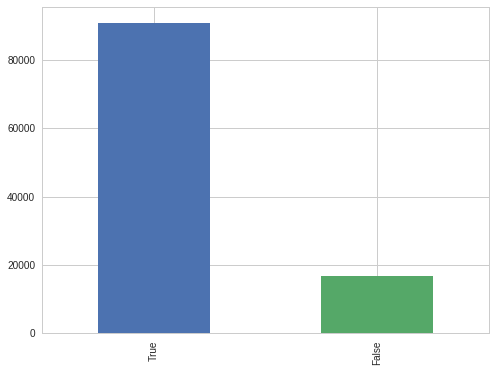

In [30]:
print(data['hasWikiEnabled'].value_counts())
data['hasWikiEnabled'].value_counts().plot.bar()

In [0]:
data['hasWikiEnabled'] = data['hasWikiEnabled'].apply(lambda x : 1 if x else 0)

## License to OneHotEncoding

In [32]:
set(data['license'])

{nan,
 'Academic Free License v3.0',
 'Apache License 2.0',
 'Artistic License 2.0',
 'BSD 2-Clause "Simplified" License',
 'BSD 3-Clause "New" or "Revised" License',
 'BSD 3-Clause Clear License',
 'Boost Software License 1.0',
 'Creative Commons Attribution 4.0',
 'Creative Commons Attribution Share Alike 4.0',
 'Creative Commons Zero v1.0 Universal',
 'Do What The F*ck You Want To Public License',
 'Eclipse Public License 1.0',
 'Educational Community License v2.0',
 'European Union Public License 1.1',
 'GNU Affero General Public License v3.0',
 'GNU General Public License v2.0',
 'GNU General Public License v3.0',
 'GNU Lesser General Public License v2.1',
 'GNU Lesser General Public License v3.0',
 'ISC License',
 'LaTeX Project Public License v1.3c',
 'MIT License',
 'Microsoft Public License',
 'Microsoft Reciprocal License',
 'Mozilla Public License 2.0',
 'Open Software License 3.0',
 'Other',
 'SIL Open Font License 1.1',
 'The Unlicense',
 'zlib License'}

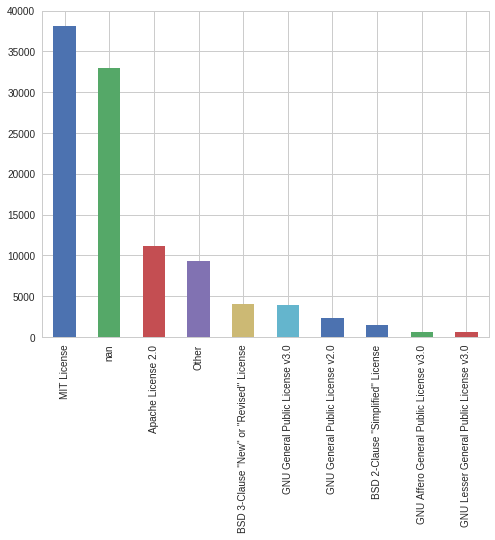

In [33]:
data['license'].value_counts(dropna = False)[:10].plot.bar()

In [0]:
data['license'] = data['license'].fillna('')

In [0]:
license_cols = ['mit_license','nan_license','apache_license','other_license','remain_license'] 

In [0]:
for i in license_cols:
  if i.startswith('mit'):
    data[i] = data['license'].apply(lambda x: 1 if x == 'MIT License' else 0)
  elif i.startswith('nan'):
    data[i] = data['license'].apply(lambda x: int(len(x) == 0))
  elif i.startswith('apache'):
    data[i] = data['license'].apply(lambda x: 1 if x == 'Apache License 2.0' else 0)
  elif i.startswith('other'):
    data[i] = data['license'].apply(lambda x: 1 if x == 'Other' else 0)    

In [0]:
data['remain_license'] = (data[license_cols[:-1]].sum(axis=1) == 0).astype(int)

In [38]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,0,18,104,0,0,0,0,1
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,False,4,10,,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,0,6,32,0,1,0,0,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,1,7,65,0,0,1,0,0
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,1,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,NaN,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,user,421622,1,7,45,0,0,1,0,0
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,1,45,48,27,38,False,19,20,,"Southampton, England",mozmorris,NaN,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,user,421836,1,2,16,0,1,0,0,0


## Primary Language to OneHotEncoding

In [39]:
data.primaryLanguage.isnull().sum()

5858

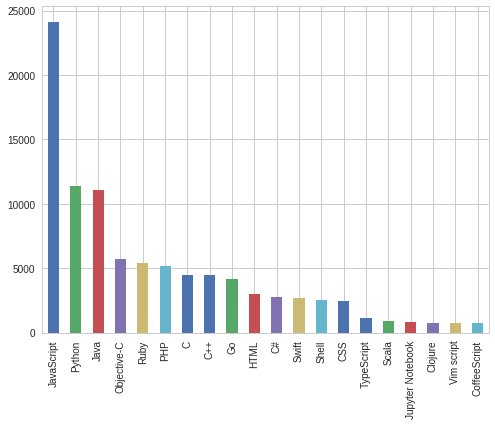

In [40]:
data.primaryLanguage.value_counts()[:20].plot.bar()

In [0]:
lang_cols = np.array(data.primaryLanguage.value_counts()[:6].index)

In [0]:
data[lang_cols[0]] = data.primaryLanguage.apply(lambda x : int(x == 'JavaScript'))                  
data[lang_cols[1]] = data.primaryLanguage.apply(lambda x : int(x == 'Python'))                  
data[lang_cols[2]] = data.primaryLanguage.apply(lambda x : int(x == 'Java'))                  
data[lang_cols[3]] = data.primaryLanguage.apply(lambda x : int(x == 'Objective-C'))                  
data[lang_cols[4]] = data.primaryLanguage.apply(lambda x : int(x == 'Ruby'))                  
data[lang_cols[5]] = data.primaryLanguage.apply(lambda x : int(x == 'PHP'))
data['other_language'] = (data[lang_cols].sum(axis=1) == 0).astype(int)

In [43]:
data.head(3)

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license,JavaScript,Python,Java,Objective-C,Ruby,PHP,other_language
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,user,421845,0,18,104,0,0,0,0,1,0,0,1,0,0,0,0
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,False,4,10,,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,user,421366,0,6,32,0,1,0,0,0,1,0,0,0,0,0,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,user,421538,1,7,65,0,0,1,0,0,0,0,0,0,0,0,1


## type to binary form 1(User) / 0(Org)

In [0]:
newDf = data

In [0]:
data['type'] = data.type.apply(lambda x : 1 if x == 'user' else 0)

In [46]:
data.members.isnull().sum()

71601

In [47]:
data.type.value_counts()

1    71601
0    36166
Name: type, dtype: int64

In [48]:
data.head(3)

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license,JavaScript,Python,Java,Objective-C,Ruby,PHP,other_language
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,NaN,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,1,421845,0,18,104,0,0,0,0,1,0,0,1,0,0,0,0
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,False,4,10,,NaN,ericdouglas,NaN,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,1,421366,0,6,32,0,1,0,0,0,1,0,0,0,0,0,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,NaN,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,1,421538,1,7,65,0,0,1,0,0,0,0,0,0,0,0,1


## Setting nan members , organizations , gists , giststar , gistComments , followers , following to 0

In [0]:
data['members'] = data['members'].fillna(0)

In [0]:
data['organizations'] = data['organizations'].fillna(0)
data['gists'] = data['gists'].fillna(0)
data['gistStar'] = data['gistStar'].fillna(0)
data['gistComments'] = data['gistComments'].fillna(0)
data['following'] = data['following'].fillna(0)
data['followers'] = data['followers'].fillna(0)

In [0]:
data.isnull().sum()

branches                   0
commits                 1650
createdAt                  0
description                0
diskUsage                  0
followers                  0
following                  0
forkCount                  0
gistComments               0
gistStar                   0
gists                      0
hasWikiEnabled             0
iClosedComments            0
iClosedParticipants        0
iOpenComments              0
iOpenParticipants          0
isArchived                 0
issuesClosed               0
issuesOpen                 0
license                    0
location               32080
login                      0
members                    0
organizations              0
prClosed                   0
prClosedComments           0
prClosedCommits            0
prMerged                   0
prMergedComments           0
prMergedCommits            0
                       ...  
primaryLanguage         5858
pushedAt                   0
readmeCharCount            0
readmeLinkCoun

## Plotting Missing Data

In [0]:
def plot_missing_data(df):
    missing_df = df.isnull().sum(axis=0).reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df.loc[missing_df['missing_count']>0]
    missing_df = missing_df.sort_values(by='missing_count')

    ind = np.arange(missing_df.shape[0])
    width = 0.9
    fig, ax = plt.subplots(figsize=(12,9))
    rects = ax.barh(ind, missing_df.missing_count.values, color=color[3])
    ax.set_yticks(ind)
    ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
    ax.set_xlabel("Count of missing values")
    ax.set_title("Number of missing values in each column")
    plt.show()

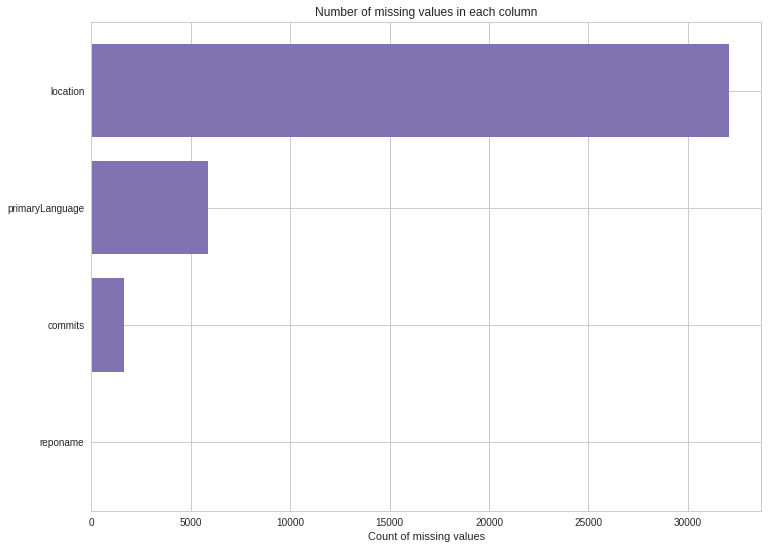

In [54]:
plot_missing_data(data)

## removing the null numCommits(of master branch) rows

In [55]:
data.commits.isnull().sum()

1650

In [0]:
data = data[data.commits.notnull()]

In [57]:
data.shape

(106117, 63)

In [58]:
data.commits.isnull().sum()

0

## Removing the null reponame rows

In [59]:
print(data.reponame.isnull().sum())
data.shape

2


(106117, 63)

In [0]:
data = data[data.reponame.notnull()]

In [61]:
print(data.reponame.isnull().sum())
data.shape

0


(106115, 63)

In [62]:
data.head()

,branches,commits,createdAt,description,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,isArchived,issuesClosed,issuesOpen,license,location,login,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,primaryLanguage,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,reponame,repositories,siteAdmin,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license,JavaScript,Python,Java,Objective-C,Ruby,PHP,other_language
0,1,700.0,394016,openScale is an open source app which support ...,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,False,109,9,GNU General Public License v3.0,Germany,oliexdev,0.0,0.0,9,39,36,67,135,188,0,0,0,Java,421887,5406,18,5406,817,19,openScale,1,False,153,17,19,1,421845,0,18,104,0,0,0,0,1,0,0,1,0,0,0,0
1,1,141.0,394024,:book: Arquivos do livro Be MEAN,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,False,4,10,,NaN,ericdouglas,0.0,1.0,4,7,8,7,8,11,0,0,0,JavaScript,401636,912,9,917,134,0,be-MEAN-resources,113,False,154,42,0,1,421366,0,6,32,0,1,0,0,0,1,0,0,0,0,0,0
2,1,95.0,394012,Automated message queue orchestration for scal...,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,False,2,4,Apache License 2.0,"Podunk, Iowa",tylertreat,0.0,3.0,0,0,0,2,0,7,1,0,29,Go,403769,5918,19,5918,882,0,Flotilla,125,False,190,14,0,1,421538,1,7,65,0,0,1,0,0,0,0,0,0,0,0,1
3,1,100.0,394027,node.js interface to the Google word2vec tool,2260,248.0,713.0,23,0.0,0.0,33.0,1,25,21,33,12,False,10,5,Apache License 2.0,"Pittsburgh, PA",Planeshifter,0.0,2.0,0,0,0,2,8,3,0,0,0,C,417782,12409,12,12409,1640,0,node-word2vec,136,False,211,12,2,1,421622,1,7,45,0,0,1,0,0,0,0,0,0,0,0,1
4,3,96.0,394018,Webcam component,131,22.0,39.0,91,0.0,2.0,8.0,1,45,48,27,38,False,19,20,,"Southampton, England",mozmorris,0.0,0.0,5,10,58,21,13,26,7,19,23,JavaScript,421098,2014,2,2014,210,0,react-webcam,43,False,218,13,2,1,421836,1,2,16,0,1,0,0,0,1,0,0,0,0,0,0


In [63]:
data.select_dtypes(include = np.bool)

,isArchived,siteAdmin
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


## Dropping Columns

In [64]:
data.columns

Index([u'branches', u'commits', u'createdAt', u'description', u'diskUsage',
       u'followers', u'following', u'forkCount', u'gistComments', u'gistStar',
       u'gists', u'hasWikiEnabled', u'iClosedComments', u'iClosedParticipants',
       u'iOpenComments', u'iOpenParticipants', u'isArchived', u'issuesClosed',
       u'issuesOpen', u'license', u'location', u'login', u'members',
       u'organizations', u'prClosed', u'prClosedComments', u'prClosedCommits',
       u'prMerged', u'prMergedComments', u'prMergedCommits', u'prOpen',
       u'prOpenComments', u'prOpenCommits', u'primaryLanguage', u'pushedAt',
       u'readmeCharCount', u'readmeLinkCount', u'readmeSize',
       u'readmeWordCount', u'releases', u'reponame', u'repositories',
       u'siteAdmin', u'stars', u'subscribersCount', u'tags', u'type',
       u'updatedAt', u'websiteUrl', u'desWordCount', u'desCharCount',
       u'mit_license', u'nan_license', u'apache_license', u'other_license',
       u'remain_license', u'JavaScript', 

In [0]:
## Columns to drop
Df = data
col = ['description' , 'isArchived' , 'license' ,'location' , 'login' , 'primaryLanguage' , 'reponame' , 'siteAdmin']
data = data.drop(col , axis = 1)

In [0]:
def count_dtypes(df):
    pd.options.display.max_rows = 65
    dtype_df = df.dtypes.reset_index()
    dtype_df.columns = ["Count", "Column Type"]
    return dtype_df.groupby("Column Type").aggregate('count').reset_index()

In [67]:
count_dtypes(data)

,Column Type,Count
0,int64,47
1,float64,8


In [68]:
data.head(3)

,branches,commits,createdAt,diskUsage,followers,following,forkCount,gistComments,gistStar,gists,hasWikiEnabled,iClosedComments,iClosedParticipants,iOpenComments,iOpenParticipants,issuesClosed,issuesOpen,members,organizations,prClosed,prClosedComments,prClosedCommits,prMerged,prMergedComments,prMergedCommits,prOpen,prOpenComments,prOpenCommits,pushedAt,readmeCharCount,readmeLinkCount,readmeSize,readmeWordCount,releases,repositories,stars,subscribersCount,tags,type,updatedAt,websiteUrl,desWordCount,desCharCount,mit_license,nan_license,apache_license,other_license,remain_license,JavaScript,Python,Java,Objective-C,Ruby,PHP,other_language
0,1,700.0,394016,132778,9.0,0.0,51,0.0,0.0,1.0,1,586,252,50,25,109,9,0.0,0.0,9,39,36,67,135,188,0,0,0,421887,5406,18,5406,817,19,1,153,17,19,1,421845,0,18,104,0,0,0,0,1,0,0,1,0,0,0,0
1,1,141.0,394024,808,1280.0,16.0,52,9.0,31.0,164.0,1,3,9,4,19,4,10,0.0,1.0,4,7,8,7,8,11,0,0,0,401636,912,9,917,134,0,113,154,42,0,1,421366,0,6,32,0,1,0,0,0,1,0,0,0,0,0,0
2,1,95.0,394012,3742,404.0,44.0,29,4.0,7.0,92.0,1,2,4,13,6,2,4,0.0,3.0,0,0,0,2,0,7,1,0,29,403769,5918,19,5918,882,0,125,190,14,0,1,421538,1,7,65,0,0,1,0,0,0,0,0,0,0,0,1


## Saving it as a PreProcessing file

In [0]:
data.to_csv('PreprocessData.csv')

In [70]:
!ls

datalab  finaldata.csv	PreprocessData.csv


In [0]:
from google.colab import files
files.download('PreprocessData.csv')